In [4]:
    %load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import cv2
import sys
sys.path.append("/M3")
from M3 import m3F as m3F
from M3 import m3Face as m3Face
from M3 import m3HoughCircle as m3HoughCircle
from M3 import m3Batch as m3Batch
from M3 import m3Pre as m3Pre
from M3 import m3Mask as m3Mask
from M3 import m3HoughCircle as m3HoughCircle
from M3 import m3MedianFilter, m3Denoising, retinexRunnable, m3Contrast, m3tv, m3Mask
from M3 import m3Batch as m3Batch
from M3 import m3Show as m3Show
from M3 import m3Niels
import numpy as np
import cv2
'''
fArray = {retinexRunnable.runMSRCP: {"inputImg": "ignorethis", "show": False},
         m3Face.findEyes: {"inputImg": "ignorethis", "show": False}, 
         m3MedianFilter.medianFilter: {"inputImg": "ignore", "show": False},
         m3F.getRed: {"inputImg": "ignorethis", "show": False},
         #m3Contrast.contrast: {"inputImg": "ignore", "show": False},
         m3tv.denoise_tv_chambolle: {"inputImg": "ignorethis", "weight": 0.1,"eps": 0.0002,"n_iter_max": 200, "multichannel": False, "show": False},
         m3HoughCircle.findCircleSimple: {"inputImg": "ignorethis", "show": False},
         m3Mask.makeCircularOutline: {"inputImg": "ignorethis", "show": False},
         m3Mask.fullImgEyeOutline: {"inputImg": "ignorethis", "show": True}
         #m3Batch.makeComparison: {"faceArray": "ignoreThis", "fileName": "nielzsimpleplusmalte3"}
          
         }
         '''
'''
fArray = {
    m3Face.findEyes: {"inputImg": "ignorethis", "show": False}, 
    retinexRunnable.runMSRCP: {"inputImg": "ignorethis", "show": True},
    m3MedianFilter.medianFilter: {"inputImg": "ignore", "show": True},
#   m3Denoising.denoise: {"inputImg": "ignore", "show": False},
     m3F.getRed: {"inputImg": "ignorethis", "show": True},
    m3Contrast.contrast: {"inputImg": "ignore", "show": False},
    m3HoughCircle.findCircleSimple: {"inputImg": "ignorethis", "show": True}}
'''

fArray = {
         m3Face.findEyes: {"photo": "ignorethis", "show": True}, 
         retinexRunnable.runMSRCP: {"inputImg": "ignorethis", "show": True},
         m3MedianFilter.medianFilter: {"inputImg": "ignore", "show": True},
         m3F.getRed: {"inputImg": "ignorethis", "show": True},
         #m3Contrast.contrast: {"inputImg": "ignore", "show": False},
#         m3tv.denoise_tv_chambolle: {"inputImg": "ignorethis", "weight": 0.1,"eps": 0.0002,"n_iter_max": 200, "multichannel": True, "show": False},
         m3HoughCircle.findCircleSimple: {"eye": "ignorethis", "show": True},
         #m3Mask.makeCircularOutline: {"photo": "ignorethis", "show": True},
         m3Mask.fullImgEyeOutline: {"photo": "ignorethis", "show": True}
         #m3Batch.makeComparison: {"faceArray": "ignoreThis", "fileName": "nielzsimpleplusmalte3"}
          
         }

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


function name runMSRCP\]
Doing an inputimg as eye.wip withrunMSRCP\]


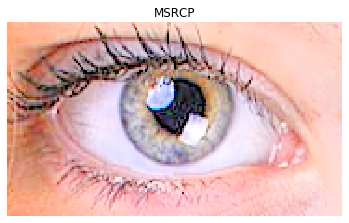

Doing an inputimg as eye.wip withrunMSRCP\]


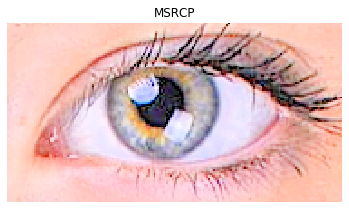

function name medianFilter\]
Doing an inputimg as eye.wip withmedianFilter\]


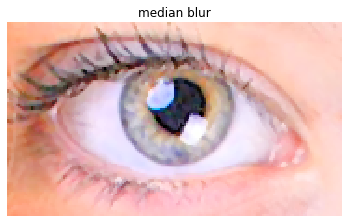

Doing an inputimg as eye.wip withmedianFilter\]


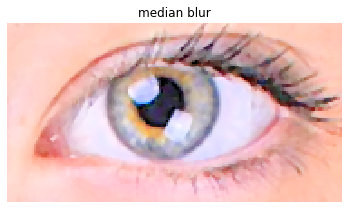

function name getRed\]
Doing an inputimg as eye.wip withgetRed\]


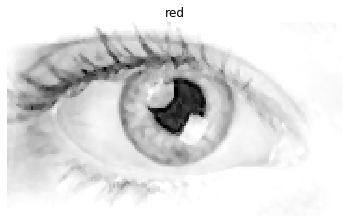

Doing an inputimg as eye.wip withgetRed\]


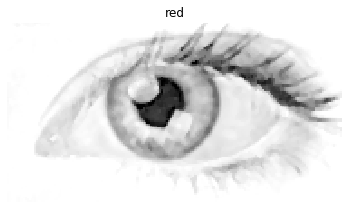

function name findCircleSimple\]
Doing an eye withfindCircleSimple\]


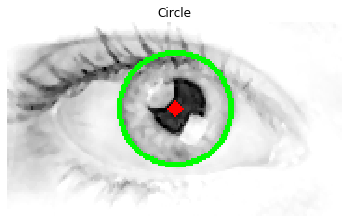

CIRCLES FOUND^^^\]
img out (104, 180)
RETURNED AN EYE WITH CIRCLES


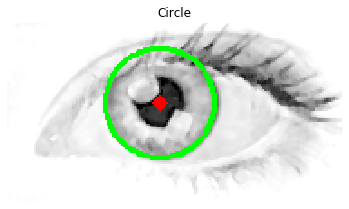

CIRCLES FOUND^^^\]
img out (99, 185)
RETURNED AN EYE WITH CIRCLES
function name fullImgEyeOutline\]
Doing an photo withfullImgEyeOutline\]


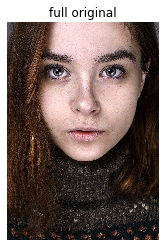

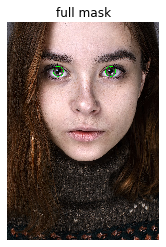

gray type:  <class 'numpy.ndarray'>


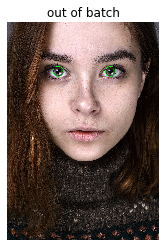

array([[[100,  92,  92],
        [ 99,  91,  91],
        [ 99,  91,  91],
        ...,
        [102,  92,  92],
        [100,  90,  90],
        [100,  90,  90]],

       [[ 98,  90,  90],
        [ 97,  89,  89],
        [ 97,  89,  89],
        ...,
        [108,  98,  98],
        [107,  97,  97],
        [104,  94,  94]],

       [[ 96,  88,  88],
        [ 96,  88,  88],
        [ 98,  88,  88],
        ...,
        [111, 101, 101],
        [112, 102, 102],
        [108,  98,  98]],

       ...,

       [[ 11,   7,   2],
        [  4,   1,   0],
        [  4,   2,   1],
        ...,
        [ 41,  57, 123],
        [ 34,  47, 103],
        [ 26,  40,  89]],

       [[  5,   2,   0],
        [  2,   1,   0],
        [  6,   4,   3],
        ...,
        [ 39,  53, 112],
        [ 31,  42,  92],
        [ 26,  35,  79]],

       [[  2,   1,   0],
        [  6,   5,   1],
        [ 13,  13,  13],
        ...,
        [ 34,  47, 103],
        [ 28,  36,  83],
        [ 22,  30,  70]]

In [3]:
bla = cv2.imread("PICTURES/InputPictures/single/girl.jpeg", -1)
gray = m3Niels.nibBatch(bla, fArray, exportAs="live", debug=True)
print("gray type: ", type(gray))
m3Show.imshow(gray,"out of batch")

# LIVE VERSION, NO ALIGN

In [4]:

cap = cv2.VideoCapture(0)


while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = m3Niels.nibBatch(frame, fArray, exportAs="live", debug=False)
    #print(type(gray))
   # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    if (type(gray) is not type(None)):
        if (len(gray.shape) > 0):
            cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

# ALIGN VERSION - PRESS q TO QUIT

In [8]:

cap = cv2.VideoCapture(0)

def capFrame():
    ret, freeze = cap.read()
    freeze = m3Niels.nibBatch(freeze, fArray, exportAs="live", debug=False)
    cv2.imshow('frame', freeze)

live = True
while(True):
    # Capture frame-by-frame
    freeze = None
    k = cv2.waitKey(1)
    if k == 32:
        print("flipped running")
        freeze = capFrame()
        live = not live
        print(live)
    if live:
        ret, frame = cap.read()
        # Our operations on the frame come here
        #print("shape:", frame.shape, (int(frame.shape[1]/3), 0), ((int(frame.shape[0]/3)*2), frame.shape[0]))
        x1 = int(frame.shape[1]/4)
        y1 = 0
        x2 = (int(frame.shape[1]/4)*3)
        y2 = frame.shape[1]
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(frame, "ALIGN YOUR FACE IN BOX. LOOK INTO CAMERA . PRESS SPACE", (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=cv2.LINE_AA) 
        cv2.imshow('frame', frame)
    else:
        pass

    if k & 0xFF == ord('q'):
        print("QUIT")
        cap.release()
        cv2.destroyAllWindows()
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

flipped running
1
False
flipped running
1
True
QUIT
